In [1]:
%%capture
!curl -L -o dynamic_6dof.zip https://rpg.ifi.uzh.ch/datasets/davis/dynamic_6dof.zip; unzip dynamic_6dof.zip; rm dynamic_6dof.zip;

In [2]:
%mkdir dynamic_6dof

In [3]:
%mv events.txt images.txt calib.txt imu.txt images groundtruth.txt dynamic_6dof

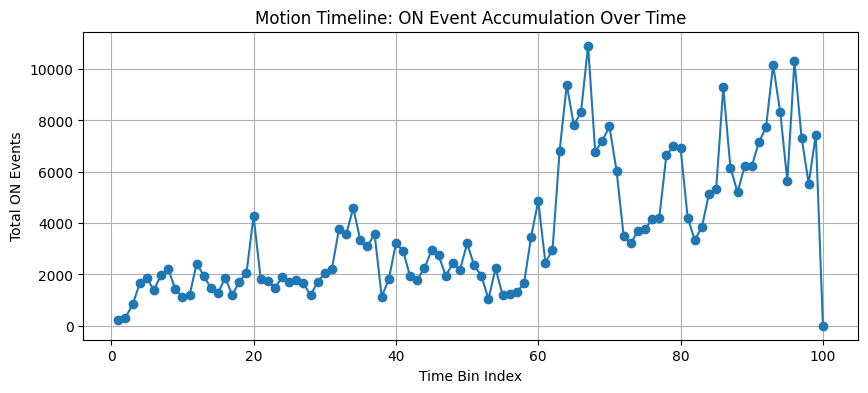

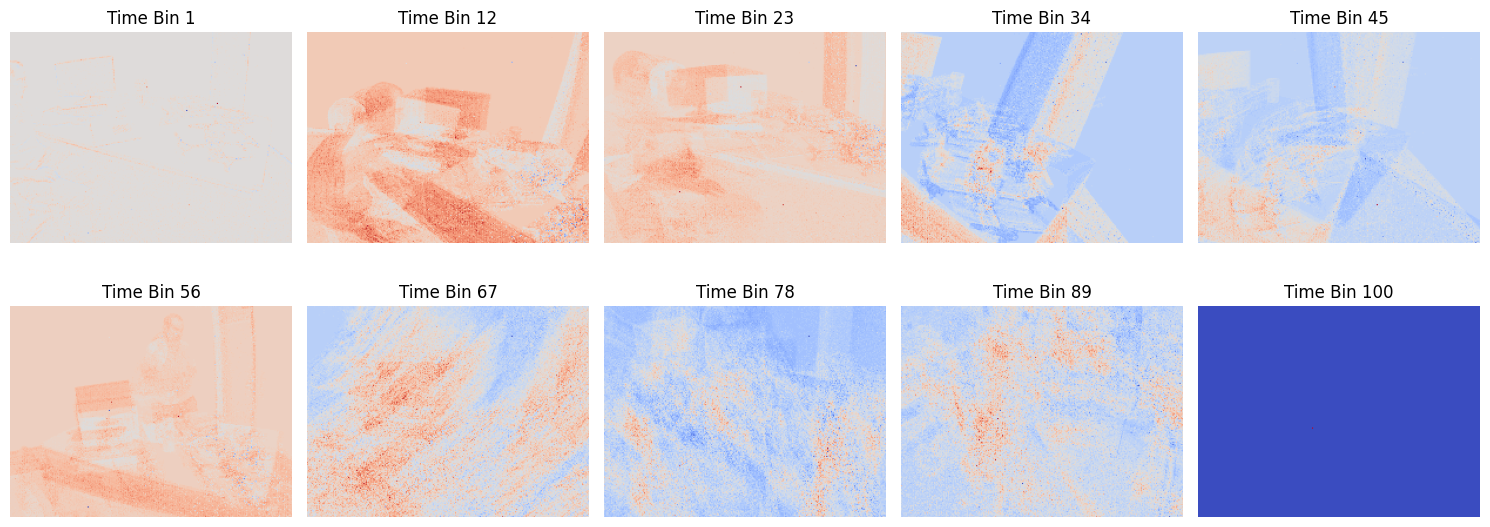

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the event data
file_path = "dynamic_6dof/events.txt"
df = pd.read_csv(file_path, sep='\s+', header=None, names=["Timestamp", "X", "Y", "Polarity"])

# Define sensor resolution dynamically
sensor_width = df["X"].max() + 1
sensor_height = df["Y"].max() + 1

# ✅ Use only ONE voxel grid with a chosen bin size
num_bins = 100  # Can change to 50 or another suitable value

# Compute time bin size
min_time, max_time = df["Timestamp"].min(), df["Timestamp"].max()
total_time = max_time - min_time
df["Time_Bin"] = ((df["Timestamp"] - min_time) / total_time * (num_bins - 1)).astype(int)

# ✅ Optimized Voxel Grid Initialization
voxel_grid = np.zeros((num_bins, sensor_height, sensor_width, 2), dtype=np.uint16)  # uint16 saves memory

# ✅ Efficiently populate voxel grid using NumPy's advanced indexing
x_coords = df["X"].values
y_coords = df["Y"].values
t_bins = df["Time_Bin"].values
polarities = (df["Polarity"].values > 0).astype(int)  # Convert to 0 (OFF) or 1 (ON)

# Use NumPy advanced indexing to efficiently accumulate values
np.add.at(voxel_grid, (t_bins, y_coords, x_coords, polarities), 1)

# ✅ Normalize voxel grid per bin (avoids looping over all bins)
voxel_grid = voxel_grid.astype(np.float32)  # Convert to float32 before division
voxel_grid /= np.maximum(voxel_grid.max(axis=(1, 2, 3), keepdims=True), 1)

# ✅ Compute motion timeline (total ON events per bin)
motion_timeline = np.sum(voxel_grid[:, :, :, 0], axis=(1, 2))  # Summing all ON events per time bin

# ✅ Plot Motion Timeline
plt.figure(figsize=(10, 4))
plt.plot(range(1, num_bins + 1), motion_timeline, marker='o', linestyle='-')
plt.xlabel("Time Bin Index")
plt.ylabel("Total ON Events")
plt.title("Motion Timeline: ON Event Accumulation Over Time")
plt.grid()
plt.show()

# ✅ Display Voxel Grid Visualization
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

# Select 10 equally spaced bins from the voxel grid
selected_bins = np.linspace(0, num_bins - 1, 10, dtype=int)

for i, t_bin in enumerate(selected_bins):
    ax = axes[i]
    ax.imshow(voxel_grid[t_bin, :, :, 0] - voxel_grid[t_bin, :, :, 1], cmap='coolwarm', origin='upper')
    ax.set_title(f"Time Bin {t_bin+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()


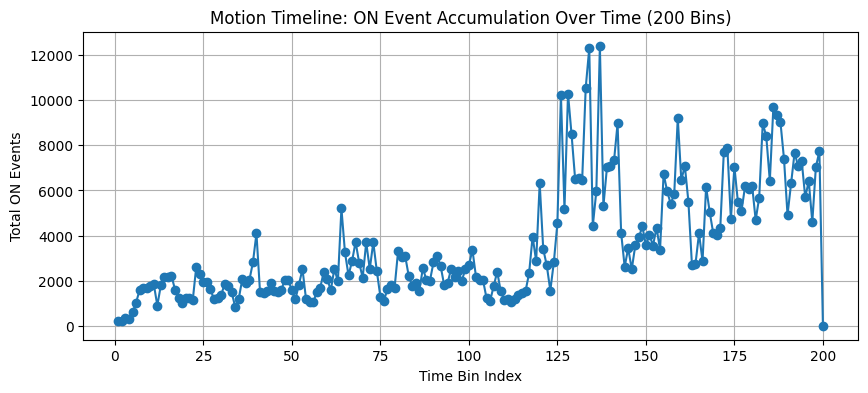

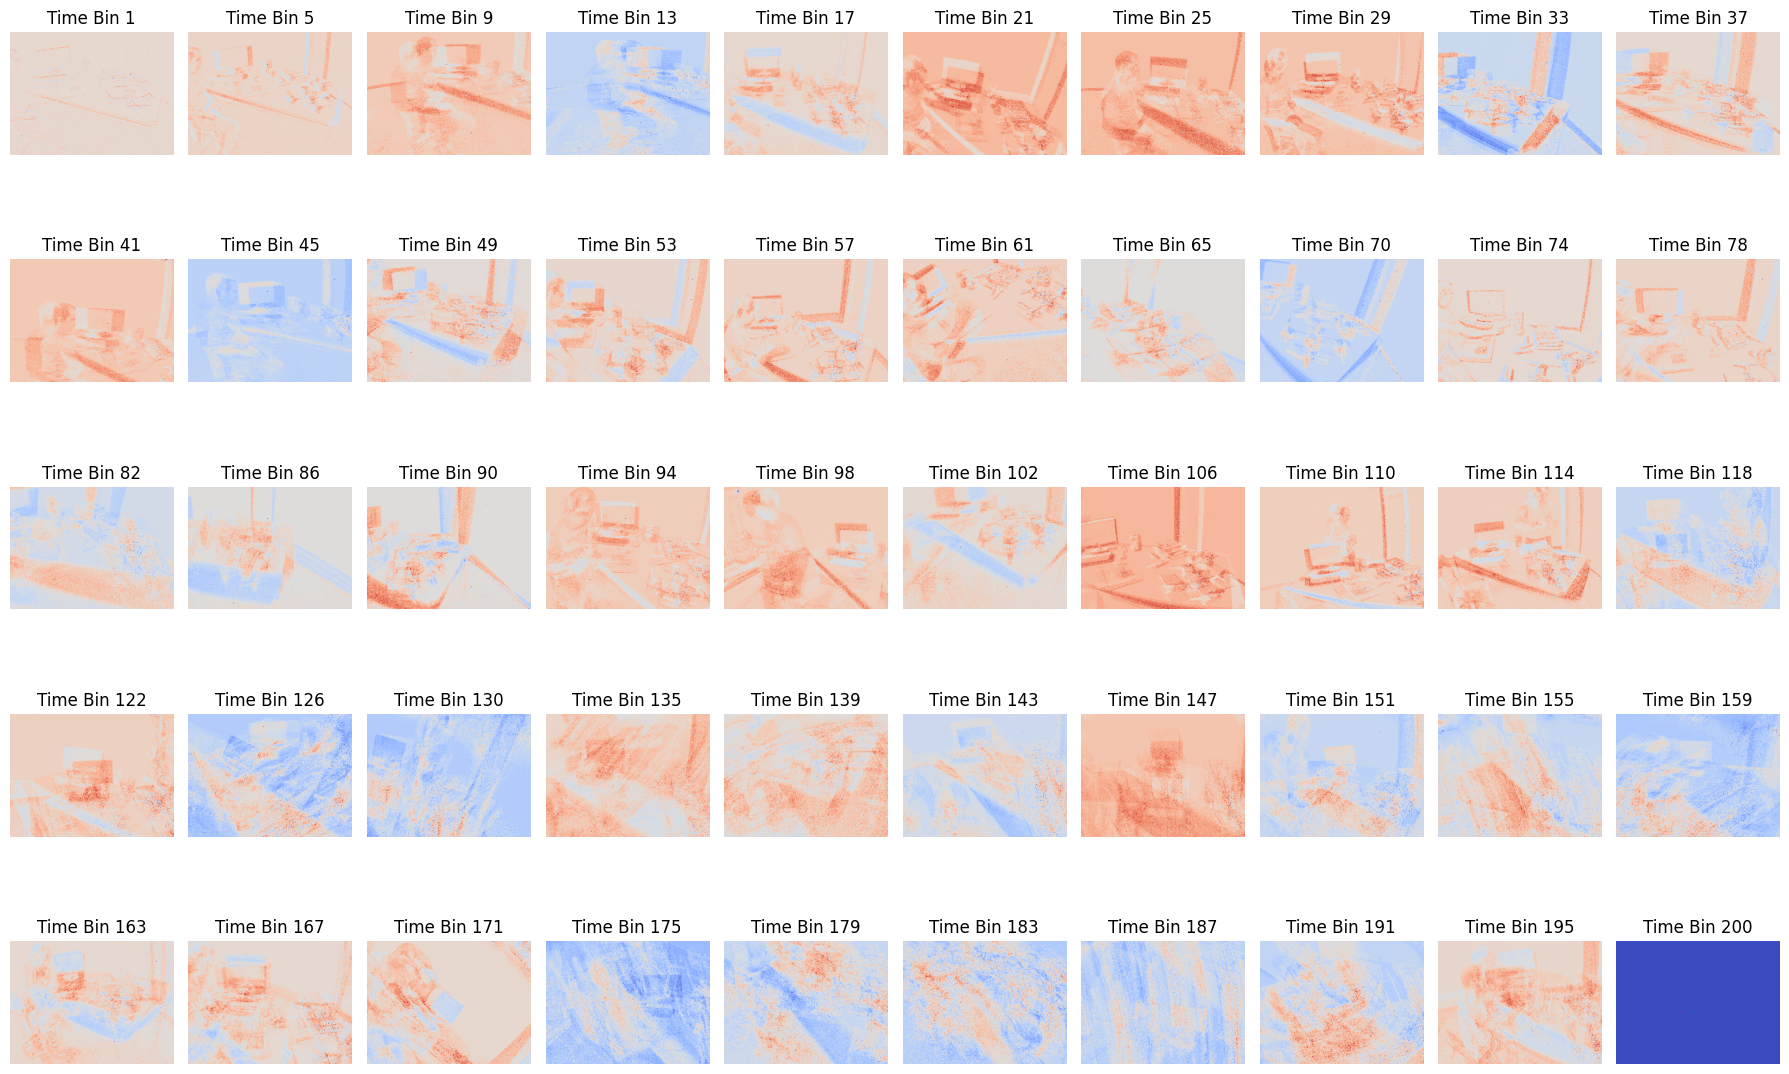

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the event data
file_path = "dynamic_6dof/events.txt"
df = pd.read_csv(file_path, sep='\s+', header=None, names=["Timestamp", "X", "Y", "Polarity"])

# Define sensor resolution dynamically
sensor_width = df["X"].max() + 1
sensor_height = df["Y"].max() + 1

# ✅ Increase to 200 Time Bins
num_bins = 200

# Compute time bin size
min_time, max_time = df["Timestamp"].min(), df["Timestamp"].max()
total_time = max_time - min_time
df["Time_Bin"] = ((df["Timestamp"] - min_time) / total_time * (num_bins - 1)).astype(int)

# ✅ Optimized Voxel Grid Initialization
voxel_grid = np.zeros((num_bins, sensor_height, sensor_width, 2), dtype=np.uint16)  # uint16 saves memory

# ✅ Efficiently populate voxel grid using NumPy's advanced indexing
x_coords = df["X"].values
y_coords = df["Y"].values
t_bins = df["Time_Bin"].values
polarities = (df["Polarity"].values > 0).astype(int)  # Convert to 0 (OFF) or 1 (ON)

# Use NumPy advanced indexing to efficiently accumulate values
np.add.at(voxel_grid, (t_bins, y_coords, x_coords, polarities), 1)

# ✅ Convert to float32 before normalization
voxel_grid = voxel_grid.astype(np.float32)  # Avoid division errors
voxel_grid /= np.maximum(voxel_grid.max(axis=(1, 2, 3), keepdims=True), 1)  # Ensure non-zero divisor

# ✅ Compute motion timeline (total ON events per bin)
motion_timeline = np.sum(voxel_grid[:, :, :, 0], axis=(1, 2))  # Summing all ON events per time bin

# ✅ Plot Motion Timeline
plt.figure(figsize=(10, 4))
plt.plot(range(1, num_bins + 1), motion_timeline, marker='o', linestyle='-')
plt.xlabel("Time Bin Index")
plt.ylabel("Total ON Events")
plt.title("Motion Timeline: ON Event Accumulation Over Time (200 Bins)")
plt.grid()
plt.show()

# ✅ Display 30 Subplots for Voxel Grid Visualization
fig, axes = plt.subplots(5, 10, figsize=(18, 12))  # 5 rows × 10 columns = 50 subplots
axes = axes.ravel()

# Select 50 equally spaced bins from the voxel grid
selected_bins = np.linspace(0, num_bins - 1, 50, dtype=int)

for i, t_bin in enumerate(selected_bins):
    ax = axes[i]
    ax.imshow(voxel_grid[t_bin, :, :, 0] - voxel_grid[t_bin, :, :, 1], cmap='coolwarm', origin='upper')
    ax.set_title(f"Time Bin {t_bin+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()


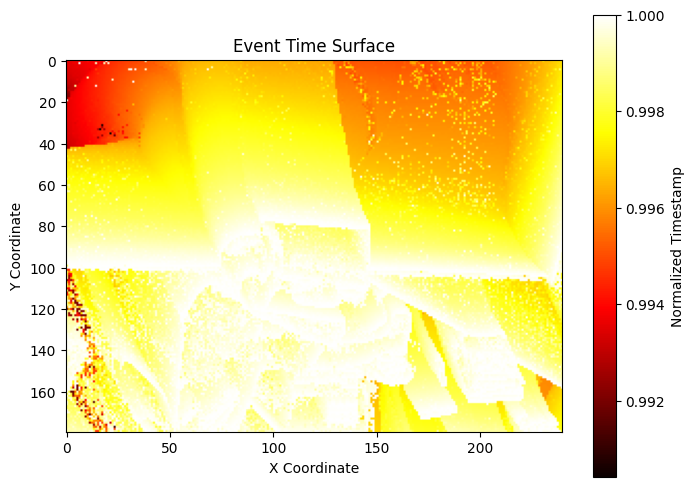

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the event data
df = pd.read_csv("/content/dynamic_6dof/events.txt", sep='\s+', header=None, names=["Timestamp", "X", "Y", "Polarity"])

# Determine sensor resolution dynamically
sensor_width = df["X"].max() + 1
sensor_height = df["Y"].max() + 1

# Create a time surface (newest events appear brightest)
time_surface = np.zeros((sensor_height, sensor_width))
max_time = df["Timestamp"].max()  # Normalize based on latest event timestamp

# Assign normalized timestamp values to the pixels
for i in range(len(df)):
    time_surface[df["Y"].iloc[i], df["X"].iloc[i]] = df["Timestamp"].iloc[i] / max_time  # Normalize to [0,1]

# Display the time surface
plt.figure(figsize=(8, 6))
plt.imshow(time_surface, cmap='hot', origin='upper')  # 'hot' colormap for time visualization
plt.colorbar(label="Normalized Timestamp")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Event Time Surface")
plt.show()


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Load the event data
file_path = "dynamic_6dof/events.txt"
df = pd.read_csv(file_path, sep='\s+', header=None, names=["Timestamp", "X", "Y", "Polarity"])

# Define sensor resolution dynamically
sensor_width = df["X"].max() + 1
sensor_height = df["Y"].max() + 1

# ✅ Define time bins for video frames
num_frames = 200  # Number of frames in the video

# Compute time bin size
min_time, max_time = df["Timestamp"].min(), df["Timestamp"].max()
total_time = max_time - min_time
df["Time_Bin"] = ((df["Timestamp"] - min_time) / total_time * (num_frames - 1)).astype(int)

# ✅ Optimized Voxel Grid Initialization
voxel_grid = np.zeros((num_frames, sensor_height, sensor_width, 2), dtype=np.uint16)

# ✅ Efficiently populate voxel grid using NumPy's advanced indexing
x_coords = df["X"].values
y_coords = df["Y"].values
t_bins = df["Time_Bin"].values
polarities = (df["Polarity"].values > 0).astype(int)  # Convert to 0 (OFF) or 1 (ON)

# Use NumPy advanced indexing to efficiently accumulate values
np.add.at(voxel_grid, (t_bins, y_coords, x_coords, polarities), 1)

# ✅ Convert to float32 before normalization
voxel_grid = voxel_grid.astype(np.float32)
voxel_grid /= np.maximum(voxel_grid.max(axis=(1, 2, 3), keepdims=True), 1)

# ✅ Video Output Setup
video_filename = "/content/event_camera_dynamic_6dof_output.mp4"  # Change path if needed
fps = 30  # Frames per second
frame_size = (sensor_width, sensor_height)  # Video frame size

# Initialize OpenCV video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
out = cv2.VideoWriter(video_filename, fourcc, fps, frame_size, isColor=False)

# ✅ Generate Video Frames
for t in range(num_frames):
    # Convert frame data to 8-bit grayscale for OpenCV
    frame = (255 * (voxel_grid[t, :, :, 0] - voxel_grid[t, :, :, 1])).astype(np.uint8)


    # Write frame to video
    out.write(frame)

# ✅ Release video writer
out.release()

print(f"Video saved as: {video_filename}")


Video saved as: /content/event_camera_dynamic_6dof_output.mp4


In [6]:
import cv2
import pandas as pd
import os

# ✅ Paths
image_txt_path = "dynamic_6dof/images.txt"
image_base_path = "dynamic_6dof/"
output_video_path = "/content/traditional_video.mp4"

# ✅ Load image metadata
image_df = pd.read_csv(image_txt_path, sep='\s+', header=None, names=["Timestamp", "Filename"])
image_df["Filename"] = image_df["Filename"].apply(lambda x: os.path.join(image_base_path, x))  # Prepend folder

# ✅ Find the first valid image to get resolution
sample_image = None
for path in image_df["Filename"]:
    if os.path.exists(path):
        sample_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if sample_image is not None:
            break

# ✅ Safety check
if sample_image is None:
    raise FileNotFoundError("❌ No valid images found. Check paths and files.")

height, width = sample_image.shape

# ✅ Set video writer
fps = 30  # Adjust based on your use case or dataset specs
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height), isColor=False)

# ✅ Write each frame
for path in image_df["Filename"]:
    if os.path.exists(path):
        frame = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if frame is not None:
            frame = cv2.resize(frame, (width, height))
            out.write(frame)
        else:
            print(f"⚠️ Could not read image: {path}")
    else:
        print(f"⚠️ Missing file: {path}")

# ✅ Finalize
out.release()
print(f"✅ Traditional frame video saved to: {output_video_path}")

✅ Traditional frame video saved to: /content/traditional_video.mp4


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os

# ✅ Load the event data
file_path = "/content/dynamic_6dof/events.txt"
df = pd.read_csv(file_path, sep='\s+', header=None, names=["Timestamp", "X", "Y", "Polarity"])

# ✅ Define sensor resolution dynamically
sensor_width = df["X"].max() + 1
sensor_height = df["Y"].max() + 1

# ✅ Define time bins for video frames
num_frames = 200  # Number of frames in the video

# Compute time bin size
min_time, max_time = df["Timestamp"].min(), df["Timestamp"].max()
total_time = max_time - min_time
df["Time_Bin"] = ((df["Timestamp"] - min_time) / total_time * (num_frames - 1)).astype(int)

# ✅ Optimized Voxel Grid Initialization
voxel_grid = np.zeros((num_frames, sensor_height, sensor_width, 2), dtype=np.uint16)

# ✅ Efficiently populate voxel grid using NumPy's advanced indexing
x_coords = df["X"].values
y_coords = df["Y"].values
t_bins = df["Time_Bin"].values
polarities = (df["Polarity"].values > 0).astype(int)  # Convert to 0 (OFF) or 1 (ON)

# Use NumPy advanced indexing to efficiently accumulate values
np.add.at(voxel_grid, (t_bins, y_coords, x_coords, polarities), 1)

# ✅ Convert to float32 before normalization
voxel_grid = voxel_grid.astype(np.float32)
voxel_grid /= np.maximum(voxel_grid.max(axis=(1, 2, 3), keepdims=True), 1)

# ✅ Video Output Setup (Without Flipping)
event_video_filename = "/content/event_camera_dynamic_6dof_output.mp4"
fps = 30  # Frames per second
frame_size = (sensor_width, sensor_height)  # Video frame size

# ✅ Initialize OpenCV video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
event_video_writer = cv2.VideoWriter(event_video_filename, fourcc, fps, frame_size, isColor=False)

# ✅ Generate Video Frames (❌ No Flip)
for t in range(num_frames):
    frame = (255 * (voxel_grid[t, :, :, 0] - voxel_grid[t, :, :, 1])).astype(np.uint8)
    event_video_writer.write(frame)

# ✅ Release video writer
event_video_writer.release()

print(f"🎥 Event Camera Video saved as: {event_video_filename}")

# ✅ Load Traditional Image Metadata
image_metadata_path = "/content/dynamic_6dof/images.txt"
image_df = pd.read_csv(image_metadata_path, sep='\s+', header=None, names=["Timestamp", "Filename"])
image_df["Filename"] = image_df["Filename"].apply(lambda x: os.path.join("dynamic_6dof", x))

# ✅ Speed Up Traditional Frames
image_timestamps = image_df["Timestamp"].values
image_timestamps = (image_timestamps - image_timestamps[0]) / image_timestamps[-1] * total_time
traditional_speed_factor = len(image_timestamps) / num_frames  # Speed up playback rate

# ✅ Load sample image for resolution check
sample_image_path = image_df["Filename"].iloc[0]
if os.path.exists(sample_image_path):
    sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
    image_height, image_width = sample_image.shape
else:
    raise FileNotFoundError(f"❌ Image file not found: {sample_image_path}")

# ✅ Resize Traditional Frame to Match Event Camera Resolution
new_width = sensor_width
new_height = int(image_height * (sensor_width / image_width))

# ✅ Create Side-by-Side Video Writer
comparison_video_filename = "/content/event_vs_traditional_dynamic_6dof_synced.mp4"
comparison_video_writer = cv2.VideoWriter(comparison_video_filename, fourcc, fps, (sensor_width * 2, sensor_height), isColor=False)

# ✅ Load Event Video for Comparison
event_video = cv2.VideoCapture(event_video_filename)

frame_index = 0
image_frame_index = 0
last_image_frame = None

while event_video.isOpened():
    ret, event_frame = event_video.read()
    if not ret:
        break

    # ✅ Speed Up Traditional Frame Index to Match Event Camera Rate
    image_frame_index = min(int(frame_index * traditional_speed_factor), len(image_timestamps) - 1)

    # ✅ Load Traditional Frame
    image_filename = image_df["Filename"].iloc[image_frame_index]
    if os.path.exists(image_filename):
        traditional_frame = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)
        traditional_frame_resized = cv2.resize(traditional_frame, (new_width, new_height))
        last_image_frame = traditional_frame_resized
    else:
        print(f"⚠️ Warning: {image_filename} not found. Using last available frame.")
        traditional_frame_resized = last_image_frame if last_image_frame is not None else np.zeros((new_height, new_width), dtype=np.uint8)

    # ✅ Resize Traditional Frame to Match Event Frame
    traditional_frame_final = cv2.resize(traditional_frame_resized, (sensor_width, sensor_height))

    # ✅ Ensure event frame is grayscale and correctly sized
    if len(event_frame.shape) == 3 and event_frame.shape[-1] == 3:
        event_frame = cv2.cvtColor(event_frame, cv2.COLOR_BGR2GRAY)

    # ✅ Ensure both frames have the same shape
    if traditional_frame_final.shape != event_frame.shape:
        event_frame = cv2.resize(event_frame, (traditional_frame_final.shape[1], traditional_frame_final.shape[0]))

    # ✅ Concatenate Traditional Frame with Event Frame (❌ No Flip)
    combined_frame = np.hstack((traditional_frame_final, event_frame))

    # ✅ Write to Output Video
    comparison_video_writer.write(combined_frame)

    frame_index += 1

# ✅ Release Resources
event_video.release()
comparison_video_writer.release()

print(f"🎥 Synchronized Side-by-Side Video saved as: {comparison_video_filename}")


🎥 Event Camera Video saved as: /content/event_camera_dynamic_6dof_output.mp4
🎥 Synchronized Side-by-Side Video saved as: /content/event_vs_traditional_dynamic_6dof_synced.mp4


In [9]:
import numpy as np
import pandas as pd
import cv2
import scipy.ndimage

# Load the event data
file_path = "dynamic_6dof/events.txt"
df = pd.read_csv(file_path, sep='\s+', header=None, names=["Timestamp", "X", "Y", "Polarity"])

# Define sensor resolution dynamically
sensor_width = df["X"].max() + 1
sensor_height = df["Y"].max() + 1

# ✅ Increase Frame Count for More Fluid Motion
num_frames = 2500

# Compute time bin size
min_time, max_time = df["Timestamp"].min(), df["Timestamp"].max()
total_time = max_time - min_time
df["Time_Bin"] = ((df["Timestamp"] - min_time) / total_time * (num_frames - 1)).astype(int)

# ✅ Optimized Voxel Grid Initialization
voxel_grid = np.zeros((num_frames, sensor_height, sensor_width, 2), dtype=np.uint16)

# ✅ Efficiently populate voxel grid using NumPy's advanced indexing
x_coords = df["X"].values
y_coords = df["Y"].values
t_bins = df["Time_Bin"].values
polarities = (df["Polarity"].values > 0).astype(int)

np.add.at(voxel_grid, (t_bins, y_coords, x_coords, polarities), 1)

# ✅ Convert to float32 before normalization
voxel_grid = voxel_grid.astype(np.float32)
voxel_grid /= np.maximum(voxel_grid.max(axis=(1, 2, 3), keepdims=True), 1)

# ✅ Adjust Temporal Accumulation to Keep Clarity & Reduce Flicker
event_accumulation = np.zeros((sensor_height, sensor_width), dtype=np.float32)
decay_factor = 0.999  # ✅ Slightly higher decay for consistency
rolling_window = 10  # ✅ Longer rolling window to avoid over-smoothing

# ✅ Video Output Setup
video_filename = "/content/event_camera_dynamic_6dof_detailed.mp4"
fps = 144
frame_size = (sensor_width, sensor_height)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_filename, fourcc, fps, frame_size, isColor=False)  # ✅ Grayscale video

# ✅ Initialize CLAHE for Balanced Local Contrast Enhancement
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))  # ✅ Increase contrast slightly for fine detail

# ✅ Motion Stabilization Variables
prev_frames = []  # ✅ Store past frames for rolling median filtering
transform_matrix = np.eye(2, 3, dtype=np.float32)  # Identity matrix for affine transformation
trajectory_x, trajectory_y = 0, 0  # Accumulated movement
kalman = cv2.KalmanFilter(4, 2)  # Kalman filter setup
kalman.transitionMatrix = np.array([[1, 0, 1, 0],
                                    [0, 1, 0, 1],
                                    [0, 0, 1, 0],
                                    [0, 0, 0, 1]], np.float32)
kalman.measurementMatrix = np.array([[1, 0, 0, 0],
                                     [0, 1, 0, 0]], np.float32)
kalman.processNoiseCov = np.eye(4, dtype=np.float32) * 1e-3
kalman.measurementNoiseCov = np.eye(2, dtype=np.float32) * 1e-1
kalman.errorCovPost = np.eye(4, dtype=np.float32) * 1

# ✅ Generate Video Frames with Maximum Detail & Stability
for t in range(num_frames):
    # ✅ Adaptive Temporal Accumulation to Maintain Uniformity
    event_accumulation = event_accumulation * decay_factor + \
                         voxel_grid[t, :, :, 0] - \
                         voxel_grid[t, :, :, 1]

    # ✅ Rolling Window for More Uniform Motion
    if t >= rolling_window:
        event_accumulation = (
            event_accumulation +
            voxel_grid[t-rolling_window:t, :, :, 0].sum(axis=0) -
            voxel_grid[t-rolling_window:t, :, :, 1].sum(axis=0)
        ) / 2

    # ✅ Normalize Frame for Balanced Brightness
    min_val, max_val = np.percentile(event_accumulation, [3, 97])  # ✅ Prevents exposure flickering
    epsilon = 1e-5
    frame = np.clip((event_accumulation - min_val) / (max_val - min_val + epsilon), 0, 1) * 255
    frame = frame.astype(np.uint8)

    # ✅ Apply CLAHE for Local Contrast Enhancement
    frame = clahe.apply(frame)

    # ✅ Multi-Scale Laplacian Sharpening for Fine Details
    laplacian = cv2.Laplacian(frame, cv2.CV_64F, ksize=3)
    frame = cv2.convertScaleAbs(frame + 0.3 * laplacian)  # ✅ Adds fine structural details back

    # ✅ Adaptive Bilateral Filtering for Edge Preservation
    frame = cv2.bilateralFilter(frame, d=9, sigmaColor=50, sigmaSpace=50)

    # ✅ Mid-Tone Contrast Boosting
    gamma_corrected = np.power(frame / 255.0, 1.1) * 255.0  # ✅ Enhances mid-tones slightly
    frame = np.clip(gamma_corrected, 0, 255).astype(np.uint8)

    # ✅ Rolling Median Filter for Frame Consistency
    prev_frames.append(frame)
    if len(prev_frames) > 6:  # ✅ Keep last 6 frames
        prev_frames.pop(0)
    frame = np.median(np.array(prev_frames), axis=0).astype(np.uint8)

    # ✅ Motion Stabilization Using Affine Transform + Kalman Filter
    if len(prev_frames) > 1:
        prev_gray = prev_frames[-2].astype(np.float32) / 255.0
        curr_gray = frame.astype(np.float32) / 255.0
        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        # Compute mean displacement
        dx, dy = np.mean(flow[..., 0]), np.mean(flow[..., 1])

        # Apply Kalman filter to smooth motion
        measurement = np.array([[dx], [dy]], np.float32)
        kalman.correct(measurement)
        prediction = kalman.predict()
        smoothed_dx, smoothed_dy = prediction[0, 0], prediction[1, 0]

        # Update trajectory
        trajectory_x -= smoothed_dx
        trajectory_y -= smoothed_dy

        # Construct affine transformation matrix for stabilization
        transform_matrix = np.array([[1, 0, trajectory_x], [0, 1, trajectory_y]], dtype=np.float32)

        # ✅ Apply stabilization to the frame
        frame = cv2.warpAffine(frame, transform_matrix, (sensor_width, sensor_height),
                               flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

    # Write frame to video
    out.write(frame)

# ✅ Release video writer
out.release()

print(f"Ultra-Detailed Event Camera Video saved as: {video_filename}")

Ultra-Detailed Event Camera Video saved as: /content/event_camera_dynamic_6dof_detailed.mp4


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os

# ✅ Load Camera Calibration Data
calib_params = np.loadtxt("dynamic_6dof/calib.txt")
fx, fy, cx, cy = calib_params[:4]
dist_coeffs = calib_params[4:].reshape(1, -1)  # Distortion coefficients

# ✅ Load IMU Data
imu_data = pd.read_csv("dynamic_6dof/imu.txt", sep='\s+', header=None, names=["Timestamp", "Ax", "Ay", "Az", "Gx", "Gy", "Gz"])

# ✅ Paths to Data
event_video_path = "/content/event_camera_dynamic_6dof_detailed.mp4"
image_metadata_path = "/content/dynamic_6dof/images.txt"
base_folder = "/content/dynamic_6dof/"
output_video_path = "/content/event_camera_vs_traditional_dynamic_6dof_detailed.mp4"

# ✅ Load image metadata
image_df = pd.read_csv(image_metadata_path, sep='\s+', header=None, names=["Timestamp", "Filename"])
image_df["Filename"] = image_df["Filename"].apply(lambda x: os.path.join(base_folder, x))

# ✅ Load Event Video
event_video = cv2.VideoCapture(event_video_path)
event_fps = event_video.get(cv2.CAP_PROP_FPS)
event_total_frames = int(event_video.get(cv2.CAP_PROP_FRAME_COUNT))
event_duration = event_total_frames / event_fps

# ✅ Normalize timestamps to event duration
image_timestamps = image_df["Timestamp"].values
image_timestamps = (image_timestamps - image_timestamps[0])
image_timestamps /= image_timestamps[-1]
image_timestamps *= event_duration

# ✅ Load sample image for resolution check
sample_image_path = image_df["Filename"].iloc[0]
if os.path.exists(sample_image_path):
    sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
    image_height, image_width = sample_image.shape
else:
    raise FileNotFoundError(f"❌ Image file not found: {sample_image_path}")

# ✅ Compute Camera Matrix
camera_matrix = np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]])

# ✅ Resize Traditional Frame to Match Event Camera Resolution
frame_width = int(event_video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(event_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
new_width = frame_width
new_height = int(image_height * (frame_width / image_width))

# ✅ Create Video Writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter(output_video_path, fourcc, event_fps, (frame_width * 2, frame_height), isColor=False)

frame_index = 0
image_frame_index = 0

while event_video.isOpened():
    ret, event_frame = event_video.read()
    if not ret:
        break

    # ✅ Convert Event Frame to Grayscale if Needed
    if len(event_frame.shape) == 3:
        event_frame = cv2.cvtColor(event_frame, cv2.COLOR_BGR2GRAY)

    # ✅ Find the Closest Traditional Frame
    current_event_time = frame_index / event_fps
    while image_frame_index < len(image_timestamps) - 1 and image_timestamps[image_frame_index] < current_event_time:
        image_frame_index += 1

    # ✅ Load Traditional Frame
    image_filename = image_df["Filename"].iloc[image_frame_index]
    if os.path.exists(image_filename):
        traditional_frame = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)
        traditional_frame_resized = cv2.resize(traditional_frame, (new_width, new_height))

        # ✅ Undistort Traditional Frame Using Camera Calibration
        traditional_frame_undistorted = cv2.undistort(traditional_frame_resized, camera_matrix, dist_coeffs)
    else:
        print(f"⚠️ Warning: {image_filename} not found. Using black frame.")
        traditional_frame_undistorted = np.zeros((new_height, new_width), dtype=np.uint8)

    # ✅ Apply IMU-Based Stabilization
    imu_entry = imu_data.iloc[image_frame_index]
    imu_correction_x = int(imu_entry["Gx"] * 5)  # Scaling factor for stability
    imu_correction_y = int(imu_entry["Gy"] * 5)

    translation_matrix = np.float32([[1, 0, -imu_correction_x], [0, 1, -imu_correction_y]])
    traditional_frame_aligned = cv2.warpAffine(traditional_frame_undistorted, translation_matrix, (frame_width, frame_height))

    # ✅ Concatenate Traditional Frame with Flipped Event Frame
    combined_frame = np.hstack((traditional_frame_aligned, event_frame))

    # ✅ Write to Output Video
    output_video.write(combined_frame)

    frame_index += 1

# ✅ Release Resources
event_video.release()
output_video.release()

print(f"🎥 Event Camera Video saved as: {output_video_path}")


🎥 Event Camera Video saved as: /content/event_camera_vs_traditional_dynamic_6dof_detailed.mp4


In [ ]:
import cv2
import os
import numpy as np

# Input paths
original_path = "/content/event_camera_dynamic_6dof_output.mp4"
filtered_path = "/content/event_camera_dynamic_6dof_detailed.mp4"
comparison_path = "/content/event_camera_comparison_labeled.mp4"

# Load both videos
vid1 = cv2.VideoCapture(original_path)
vid2 = cv2.VideoCapture(filtered_path)

# Get common properties
fps = min(vid1.get(cv2.CAP_PROP_FPS), vid2.get(cv2.CAP_PROP_FPS))
width = int(vid2.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vid2.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_size = (width * 2, height)

# Calculate minimum number of frames to synchronize duration
total_frames = int(min(vid1.get(cv2.CAP_PROP_FRAME_COUNT), vid2.get(cv2.CAP_PROP_FRAME_COUNT)))

# Output writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(comparison_path, fourcc, fps, frame_size, isColor=True)

# Font settings
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 255, 255)
font_thickness = 2
divider_color = (255, 255, 255)

print(f"🎞️ Creating full-length labeled comparison video for {total_frames} frames...")

for _ in range(total_frames):
    ret1, frame1 = vid1.read()
    ret2, frame2 = vid2.read()

    if not ret1 or not ret2:
        break

    # Convert to grayscale if needed
    if frame1.ndim == 3:
        frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    if frame2.ndim == 3:
        frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Resize raw frame to match filtered
    frame1 = cv2.resize(frame1, (width, height))

    # Convert to BGR to draw labels and divider
    frame1_color = cv2.cvtColor(frame1, cv2.COLOR_GRAY2BGR)
    frame2_color = cv2.cvtColor(frame2, cv2.COLOR_GRAY2BGR)

    # Add labels
    cv2.putText(frame1_color, "Raw", (20, 40), font, font_scale, font_color, font_thickness, cv2.LINE_AA)
    cv2.putText(frame2_color, "Filtered", (20, 40), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    # Concatenate with divider
    combined = np.hstack((frame1_color, frame2_color))
    cv2.line(combined, (width, 0), (width, height), divider_color, 2)

    out.write(combined)

# Cleanup
vid1.release()
vid2.release()
out.release()

print(f"✅ Full-length comparison saved: {comparison_path}")


🎞️ Creating full-length labeled comparison video for 200 frames...
✅ Full-length comparison saved: /content/event_camera_comparison_labeled.mp4


In [ ]:
import cv2
import numpy as np

# Input videos
raw_path = "/content/event_camera_dynamic_6dof_output.mp4"
filtered_path = "/content/event_camera_dynamic_6dof_detailed.mp4"
output_path = "/content/event_camera_comparison_synced_fixed.mp4"

# Load both videos
raw_cap = cv2.VideoCapture(raw_path)
filtered_cap = cv2.VideoCapture(filtered_path)

# Get metadata
filtered_fps = int(filtered_cap.get(cv2.CAP_PROP_FPS))
filtered_frame_count = int(filtered_cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(filtered_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(filtered_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Read all raw frames into memory (because we'll repeat them)
raw_frames = []
while True:
    ret, frame = raw_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    gray = cv2.resize(gray, (frame_width, frame_height))
    raw_frames.append(gray)
raw_cap.release()

# How many raw frames to stretch across filtered ones
raw_total = len(raw_frames)
repeat_factor = int(np.ceil(filtered_frame_count / raw_total))

# Stretch raw video to match filtered length
raw_stretched = []
for frame in raw_frames:
    raw_stretched.extend([frame] * repeat_factor)
raw_stretched = raw_stretched[:filtered_frame_count]  # Trim if overshot

# Prepare output writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, filtered_fps, (frame_width * 2, frame_height), isColor=True)

font = cv2.FONT_HERSHEY_SIMPLEX

# Process frames
for i in range(filtered_frame_count):
    ret, filt_frame = filtered_cap.read()
    if not ret:
        break

    # Process filtered frame
    filt_gray = cv2.cvtColor(filt_frame, cv2.COLOR_BGR2GRAY) if len(filt_frame.shape) == 3 else filt_frame
    filt_gray = cv2.resize(filt_gray, (frame_width, frame_height))

    # Raw frame from stretched list
    raw_gray = raw_stretched[i]

    # Convert both to color for annotation
    filt_col = cv2.cvtColor(filt_gray, cv2.COLOR_GRAY2BGR)
    raw_col = cv2.cvtColor(raw_gray, cv2.COLOR_GRAY2BGR)

    # Add labels
    cv2.putText(raw_col, "Raw", (20, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(filt_col, "Filtered", (20, 40), font, 1, (255, 255, 255), 2)

    # Stack and draw divider
    combined = np.hstack((raw_col, filt_col))
    cv2.line(combined, (frame_width, 0), (frame_width, frame_height), (255, 255, 255), 2)

    out.write(combined)

filtered_cap.release()
out.release()

print(f"✅ Synced comparison video saved to: {output_path}")


✅ Synced comparison video saved to: /content/event_camera_comparison_synced_fixed.mp4


In [ ]:
import cv2
import numpy as np

# Input paths
raw_path = "/content/event_camera_dynamic_6dof_output.mp4"
filtered_path = "/content/event_camera_dynamic_6dof_detailed.mp4"
output_path = "/content/event_camera_comparison_synced_annotated.mp4"

# Load both videos
raw_cap = cv2.VideoCapture(raw_path)
filtered_cap = cv2.VideoCapture(filtered_path)

# Metadata
filtered_fps = int(filtered_cap.get(cv2.CAP_PROP_FPS))
filtered_frame_count = int(filtered_cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(filtered_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(filtered_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Load all raw frames
raw_frames = []
while True:
    ret, frame = raw_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    gray = cv2.resize(gray, (frame_width, frame_height))
    raw_frames.append(gray)
raw_cap.release()

# Stretch raw frames to match filtered
repeat_factor = int(np.ceil(filtered_frame_count / len(raw_frames)))
raw_stretched = []
for frame in raw_frames:
    raw_stretched.extend([frame] * repeat_factor)
raw_stretched = raw_stretched[:filtered_frame_count]

# Output writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, filtered_fps, (frame_width * 2, frame_height), isColor=True)

font = cv2.FONT_HERSHEY_SIMPLEX

# Overlay frames
for i in range(filtered_frame_count):
    ret, filt_frame = filtered_cap.read()
    if not ret:
        break

    # Preprocess filtered frame
    filt_gray = cv2.cvtColor(filt_frame, cv2.COLOR_BGR2GRAY) if len(filt_frame.shape) == 3 else filt_frame
    filt_gray = cv2.resize(filt_gray, (frame_width, frame_height))

    # Raw frame
    raw_gray = raw_stretched[i]

    # Convert to color for overlay
    filt_col = cv2.cvtColor(filt_gray, cv2.COLOR_GRAY2BGR)
    raw_col = cv2.cvtColor(raw_gray, cv2.COLOR_GRAY2BGR)

    # Add labels
    cv2.putText(raw_col, "Raw", (20, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(filt_col, "Filtered", (20, 40), font, 1, (255, 255, 255), 2)

    # Add frame number and timestamp

    timestamp = i / filtered_fps
    label = f"Frame {i+1} | Time: {timestamp:.2f}s"
    cv2.putText(raw_col, label, (20, frame_height - 20), font, 0.45, (200, 255, 200), 1)
    cv2.putText(filt_col, label, (20, frame_height - 20), font, 0.45, (200, 255, 200), 1)


    # Stack and draw divider
    combined = np.hstack((raw_col, filt_col))
    cv2.line(combined, (frame_width, 0), (frame_width, frame_height), (255, 255, 255), 2)

    out.write(combined)

filtered_cap.release()
out.release()

print(f"✅ Synced and annotated comparison video saved to: {output_path}")


✅ Synced and annotated comparison video saved to: /content/event_camera_comparison_synced_annotated.mp4


In [ ]:
import cv2
import numpy as np

# Input paths
raw_path = "/content/event_camera_dynamic_6dof_output.mp4"
filtered_path = "/content/event_camera_dynamic_6dof_detailed.mp4"
output_path = "/content/event_camera_comparison_slow_after_10s.mp4"

# Load both videos
raw_cap = cv2.VideoCapture(raw_path)
filtered_cap = cv2.VideoCapture(filtered_path)

# Metadata
filtered_fps = int(filtered_cap.get(cv2.CAP_PROP_FPS))
filtered_frame_count = int(filtered_cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(filtered_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(filtered_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Load all raw frames
raw_frames = []
while True:
    ret, frame = raw_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    gray = cv2.resize(gray, (frame_width, frame_height))
    raw_frames.append(gray)
raw_cap.release()

# Stretch raw frames to match filtered
repeat_factor = int(np.ceil(filtered_frame_count / len(raw_frames)))
raw_stretched = []
for frame in raw_frames:
    raw_stretched.extend([frame] * repeat_factor)
raw_stretched = raw_stretched[:filtered_frame_count]

# Determine split point (10 seconds in)
split_frame = int(filtered_fps * 10)

# Load filtered frames into memory
filtered_frames = []
while True:
    ret, frame = filtered_cap.read()
    if not ret:
        break
    filt_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    filt_gray = cv2.resize(filt_gray, (frame_width, frame_height))
    filtered_frames.append(filt_gray)
filtered_cap.release()

# Slow down frames AFTER 10s
filtered_processed = filtered_frames[:split_frame]
for frame in filtered_frames[split_frame:]:
    filtered_processed.extend([frame] * 2)  # Slow down by duplicating each frame

# Update final frame count
final_frame_count = len(filtered_processed)

# Output writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, filtered_fps, (frame_width * 2, frame_height), isColor=True)

font = cv2.FONT_HERSHEY_SIMPLEX

# Overlay loop
for i in range(final_frame_count):
    if i >= len(raw_stretched) or i >= len(filtered_processed):
        break

    raw_gray = raw_stretched[i]
    filt_gray = filtered_processed[i]

    raw_col = cv2.cvtColor(raw_gray, cv2.COLOR_GRAY2BGR)
    filt_col = cv2.cvtColor(filt_gray, cv2.COLOR_GRAY2BGR)

    # Labels
    cv2.putText(raw_col, "Raw", (20, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(filt_col, "Filtered", (20, 40), font, 1, (255, 255, 255), 2)

    timestamp = i / filtered_fps
    label = f"Frame {i+1} | Time: {timestamp:.2f}s"
    cv2.putText(raw_col, label, (20, frame_height - 20), font, 0.45, (200, 255, 200), 1)
    cv2.putText(filt_col, label, (20, frame_height - 20), font, 0.45, (200, 255, 200), 1)

    combined = np.hstack((raw_col, filt_col))
    cv2.line(combined, (frame_width, 0), (frame_width, frame_height), (255, 255, 255), 2)

    out.write(combined)

out.release()
print(f"✅ Comparison video with slowed second half saved at: {output_path}")


✅ Comparison video with slowed second half saved at: /content/event_camera_comparison_slow_after_10s.mp4


In [ ]:
import cv2
import numpy as np

# Input paths
raw_path = "/content/event_camera_dynamic_6dof_output.mp4"
filtered_path = "/content/event_camera_dynamic_6dof_detailed.mp4"
output_path = "/content/event_camera_comparison_fully_synced.mp4"

# Load both videos
raw_cap = cv2.VideoCapture(raw_path)
filtered_cap = cv2.VideoCapture(filtered_path)

# Metadata
filtered_fps = int(filtered_cap.get(cv2.CAP_PROP_FPS))
frame_width = int(filtered_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(filtered_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# ✅ Load all raw frames
raw_frames = []
while True:
    ret, frame = raw_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    gray = cv2.resize(gray, (frame_width, frame_height))
    raw_frames.append(gray)
raw_cap.release()

# ✅ Load all filtered frames
filtered_frames = []
while True:
    ret, frame = filtered_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    gray = cv2.resize(gray, (frame_width, frame_height))
    filtered_frames.append(gray)
filtered_cap.release()

# ✅ Slow down only after 10s (preserve all frames)
split_frame = int(filtered_fps * 10)
filtered_slowed = []

for i, frame in enumerate(filtered_frames):
    if i < split_frame:
        filtered_slowed.append(frame)
    else:
        filtered_slowed.extend([frame] * 2)  # Slow down by duplicating frames

# ✅ Match raw to slowed filtered length
repeat_factor = int(np.ceil(len(filtered_slowed) / len(raw_frames)))
raw_stretched = []
for frame in raw_frames:
    raw_stretched.extend([frame] * repeat_factor)
raw_stretched = raw_stretched[:len(filtered_slowed)]

# ✅ Create video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, filtered_fps, (frame_width * 2, frame_height), isColor=True)

font = cv2.FONT_HERSHEY_SIMPLEX

# ✅ Overlay and write frames
for i in range(len(filtered_slowed)):
    raw_frame = raw_stretched[i]
    filt_frame = filtered_slowed[i]

    # Convert to BGR
    raw_col = cv2.cvtColor(raw_frame, cv2.COLOR_GRAY2BGR)
    filt_col = cv2.cvtColor(filt_frame, cv2.COLOR_GRAY2BGR)

    # Labels
    cv2.putText(raw_col, "Raw", (20, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(filt_col, "Filtered", (20, 40), font, 1, (255, 255, 255), 2)

    # Timestamps
    timestamp = i / filtered_fps
    label = f"Frame {i+1} | Time: {timestamp:.2f}s"
    cv2.putText(raw_col, label, (20, frame_height - 20), font, 0.45, (200, 255, 200), 1)
    cv2.putText(filt_col, label, (20, frame_height - 20), font, 0.45, (200, 255, 200), 1)

    # Divider
    combined = np.hstack((raw_col, filt_col))
    cv2.line(combined, (frame_width, 0), (frame_width, frame_height), (255, 255, 255), 2)

    out.write(combined)

out.release()
print(f"✅ Final synced comparison saved to: {output_path}")

✅ Final synced comparison saved to: /content/event_camera_comparison_fully_synced.mp4


In [ ]:
import cv2
import numpy as np

# Paths
raw_path = "/content/event_camera_dynamic_6dof_output.mp4"
filtered_path = "/content/event_camera_dynamic_6dof_detailed.mp4"
output_path = "/content/event_camera_comparison_event_matched.mp4"

# Read raw video
raw_cap = cv2.VideoCapture(raw_path)
raw_frames = []
while True:
    ret, frame = raw_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    raw_frames.append(gray)
raw_cap.release()

# Read filtered video
filtered_cap = cv2.VideoCapture(filtered_path)
filtered_frames = []
while True:
    ret, frame = filtered_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    filtered_frames.append(gray)
filtered_cap.release()

# Get frame dimensions
h, w = filtered_frames[0].shape
raw_frames = [cv2.resize(f, (w, h)) for f in raw_frames]

# Output writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 30
out = cv2.VideoWriter(output_path, fourcc, fps, (w * 2, h), isColor=True)
font = cv2.FONT_HERSHEY_SIMPLEX

# Match each filtered frame to best raw frame by similarity
search_window = 30
for i, filt in enumerate(filtered_frames):
    best_score = -np.inf
    best_index = -1

    for j in range(max(0, i - search_window), min(len(raw_frames), i + search_window)):
        raw = raw_frames[j]
        if filt.size != raw.size:
            continue
        score = np.corrcoef(filt.flatten(), raw.flatten())[0, 1]
        if score > best_score:
            best_score = score
            best_index = j

    # Fallback if no match found
    if best_index == -1:
        best_match = np.zeros((h, w), dtype=np.uint8)
        match_label = "Raw (no match)"
    else:
        best_match = raw_frames[best_index]
        match_label = f"Raw (match {best_index})"

    # Convert to color
    raw_col = cv2.cvtColor(best_match, cv2.COLOR_GRAY2BGR)
    filt_col = cv2.cvtColor(filt, cv2.COLOR_GRAY2BGR)

    # Annotate
    cv2.putText(raw_col, match_label, (20, 40), font, 0.9, (255, 255, 255), 2)
    cv2.putText(filt_col, f"Filtered (frame {i})", (20, 40), font, 0.9, (255, 255, 255), 2)

    # Add timestamp
    timestamp = i / fps
    label = f"Time: {timestamp:.2f}s"
    cv2.putText(raw_col, label, (20, h - 20), font, 0.45, (200, 255, 200), 1)
    cv2.putText(filt_col, label, (20, h - 20), font, 0.45, (200, 255, 200), 1)

    combined = np.hstack((raw_col, filt_col))
    cv2.line(combined, (w, 0), (w, h), (255, 255, 255), 2)

    out.write(combined)

out.release()
print(f"✅ Final matched comparison saved to: {output_path}")

✅ Final matched comparison saved to: /content/event_camera_comparison_event_matched.mp4


In [10]:
import cv2
import numpy as np

# Paths
raw_path = "/content/event_camera_dynamic_6dof_output.mp4"
filtered_path = "/content/event_camera_dynamic_6dof_detailed.mp4"
output_path = "/content/event_camera_synced_comparison_final.mp4"

# Load raw video
raw_cap = cv2.VideoCapture(raw_path)
raw_frames = []
while True:
    ret, frame = raw_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    raw_frames.append(gray)
raw_cap.release()

# Load filtered video
filtered_cap = cv2.VideoCapture(filtered_path)
filtered_frames = []
while True:
    ret, frame = filtered_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    filtered_frames.append(gray)
filtered_cap.release()

# Frame shape
height, width = filtered_frames[0].shape
raw_frames = [cv2.resize(f, (width, height)) for f in raw_frames]

# Sync lengths by stretching both to same final frame count (e.g., 2500)
final_frame_count = 2500
raw_interp = np.linspace(0, len(raw_frames) - 1, final_frame_count).astype(int)
filt_interp = np.linspace(0, len(filtered_frames) - 1, final_frame_count).astype(int)
synced_raw = [raw_frames[i] for i in raw_interp]
synced_filt = [filtered_frames[i] for i in filt_interp]

# Output writer
fps = 30
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width * 2, height), isColor=True)

font = cv2.FONT_HERSHEY_SIMPLEX

# Generate output frames
for i in range(final_frame_count):
    raw_frame = synced_raw[i]
    filt_frame = synced_filt[i]

    # Convert to color
    raw_col = cv2.cvtColor(raw_frame, cv2.COLOR_GRAY2BGR)
    filt_col = cv2.cvtColor(filt_frame, cv2.COLOR_GRAY2BGR)

    # Add labels
    cv2.putText(raw_col, "Raw", (20, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(filt_col, "Filtered", (20, 40), font, 1, (255, 255, 255), 2)

    # Add timestamp
    timestamp = i / fps
    label = f"Time: {timestamp:.2f}s | Frame {i+1}"
    cv2.putText(raw_col, label, (20, height - 20), font, 0.45, (200, 255, 200), 1)
    cv2.putText(filt_col, label, (20, height - 20), font, 0.45, (200, 255, 200), 1)

    # Combine with divider
    combined = np.hstack((raw_col, filt_col))
    cv2.line(combined, (width, 0), (width, height), (255, 255, 255), 2)

    out.write(combined)

out.release()
print(f"✅ Synced and stretched comparison video saved to: {output_path}")

✅ Synced and stretched comparison video saved to: /content/event_camera_synced_comparison_final.mp4


In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Paths
input_video_path = "/content/event_camera_synced_comparison_final.mp4"
output_video_path = "/content/event_camera_comparison_with_scores.mp4"

# Load the side-by-side comparison video
cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Assume raw and filtered are side-by-side (split width-wise)
half_width = frame_width // 2

# Video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height), isColor=True)

font = cv2.FONT_HERSHEY_SIMPLEX

frame_idx = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Split into raw and filtered
    raw = frame[:, :half_width]
    filtered = frame[:, half_width:]

    # Convert to grayscale for comparison
    raw_gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
    filtered_gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)

    # Compute SSIM and PSNR
    sim_score = ssim(raw_gray, filtered_gray)
    psnr_score = cv2.PSNR(raw_gray, filtered_gray)

    # Overlay similarity scores
    label = f"SSIM: {sim_score:.4f}  |  PSNR: {psnr_score:.2f} dB"
    cv2.putText(frame, label, (20, 50), font, 0.6, (0, 255, 255), 2, cv2.LINE_AA)

    # Write to output
    out.write(frame)
    frame_idx += 1

cap.release()
out.release()
print(f"✅ Annotated video with similarity scores saved to: {output_video_path}")

✅ Annotated video with similarity scores saved to: /content/event_camera_comparison_with_scores.mp4


In [11]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import math

# Load the comparison video
video_path = "/content/event_camera_synced_comparison_final.mp4"
cap = cv2.VideoCapture(video_path)

# Metadata
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Output video with score overlays
out_path = "/content/event_camera_comparison_with_scores_adjusted.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(out_path, fourcc, fps, (width, height), isColor=True)

# Storage for SSIM & PSNR
ssim_scores = []
psnr_scores = []

# Loop through frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Split raw and filtered frames
    raw = frame[:, :width//2]
    filtered = frame[:, width//2:]

    # Convert to grayscale for SSIM/PSNR
    raw_gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
    filt_gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)

    # Compute SSIM and PSNR
    score_ssim = ssim(raw_gray, filt_gray)
    score_psnr = cv2.PSNR(raw_gray, filt_gray)
    ssim_scores.append(score_ssim)
    psnr_scores.append(score_psnr)

    # Overlay text (lower-middle)
    text = f"SSIM: {score_ssim:.4f} | PSNR: {score_psnr:.2f} dB"
    cv2.putText(frame, text,
                (width//2 - 200, height - 40),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (200, 255, 255), 2)

    out.write(frame)

cap.release()
out.release()
print(f"✅ Updated video saved to: {out_path}")

✅ Updated video saved to: /content/event_camera_comparison_with_scores_adjusted.mp4


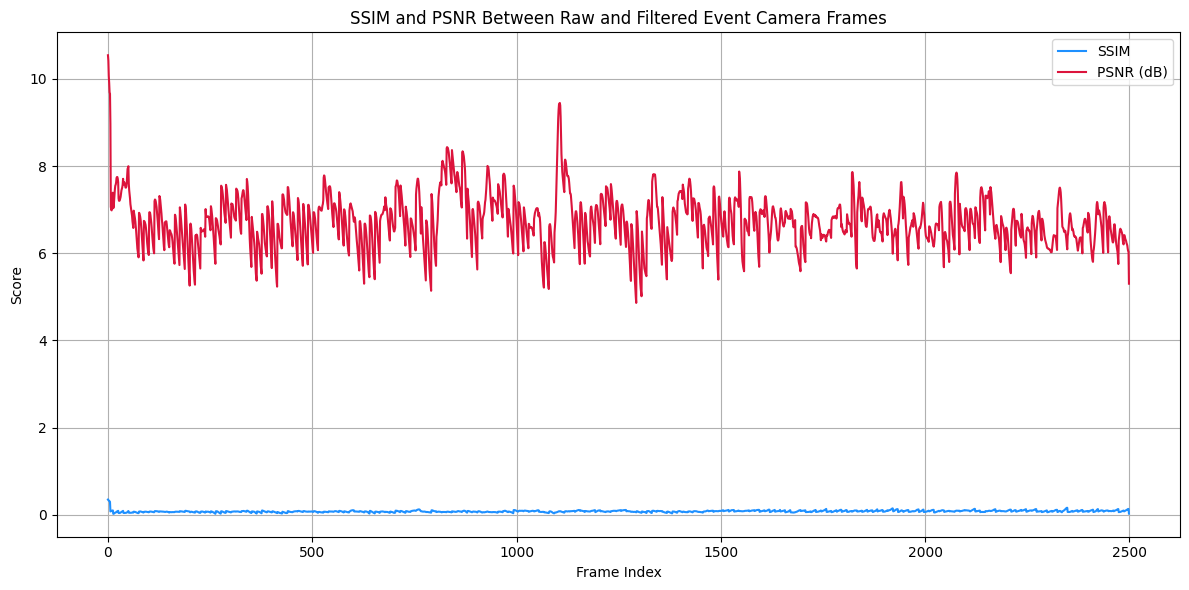

In [ ]:
import matplotlib.pyplot as plt

# Plot SSIM and PSNR
plt.figure(figsize=(12, 6))
plt.plot(ssim_scores, label="SSIM", color='dodgerblue')
plt.plot(psnr_scores, label="PSNR (dB)", color='crimson')
plt.xlabel("Frame Index")
plt.ylabel("Score")
plt.title("SSIM and PSNR Between Raw and Filtered Event Camera Frames")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import os

raw_path = "/content/event_camera_dynamic_6dof_output.mp4"
filtered_path = "/content/event_camera_dynamic_6dof_detailed.mp4"

os.makedirs("training_data/raw", exist_ok=True)
os.makedirs("training_data/clean", exist_ok=True)

raw_cap = cv2.VideoCapture(raw_path)
filtered_cap = cv2.VideoCapture(filtered_path)

idx = 0
while True:
    ret_raw, raw_frame = raw_cap.read()
    ret_filtered, clean_frame = filtered_cap.read()

    if not ret_raw or not ret_filtered:
        break

    # Convert to grayscale if needed
    if len(raw_frame.shape) == 3:
        raw_frame = cv2.cvtColor(raw_frame, cv2.COLOR_BGR2GRAY)
    if len(clean_frame.shape) == 3:
        clean_frame = cv2.cvtColor(clean_frame, cv2.COLOR_BGR2GRAY)

    cv2.imwrite(f"training_data/raw/frame_{idx:04d}.png", raw_frame)
    cv2.imwrite(f"training_data/clean/frame_{idx:04d}.png", clean_frame)
    idx += 1

raw_cap.release()
filtered_cap.release()

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

class EventDenoiseDataset(Dataset):
    def __init__(self, raw_dir, clean_dir, transform=None):
        self.raw_paths = sorted([os.path.join(raw_dir, f) for f in os.listdir(raw_dir)])
        self.clean_paths = sorted([os.path.join(clean_dir, f) for f in os.listdir(clean_dir)])
        self.transform = transform or T.Compose([
            T.Resize((128, 128)),
            T.ToTensor()
        ])

    def __len__(self):
        return len(self.raw_paths)

    def __getitem__(self, idx):
        raw = self.transform(Image.open(self.raw_paths[idx]).convert('L'))
        clean = self.transform(Image.open(self.clean_paths[idx]).convert('L'))
        return raw, clean

dataset = EventDenoiseDataset("training_data/raw", "training_data/clean")
loader = DataLoader(dataset, batch_size=8, shuffle=True)

class DenoiseUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 32, 3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 1, 3, padding=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        return self.decoder(x)

model = DenoiseUNet().cuda()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training loop (very basic)
for epoch in range(10):
    for noisy, clean in loader:
        noisy, clean = noisy.cuda(), clean.cuda()
        pred = model(noisy)
        loss = loss_fn(pred, clean)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

Epoch 1: Loss = 0.0255
Epoch 2: Loss = 0.0220
Epoch 3: Loss = 0.0252
Epoch 4: Loss = 0.0317
Epoch 5: Loss = 0.0221
Epoch 6: Loss = 0.0200
Epoch 7: Loss = 0.0263
Epoch 8: Loss = 0.0300
Epoch 9: Loss = 0.0254
Epoch 10: Loss = 0.0201


In [6]:
import cv2
import numpy as np

# Paths
input_video_path = "/content/event_camera_dynamic_6dof_output.mp4"  # Your original video
output_video_path = "/content/event_camera_quantized_comparison.mp4"

# Load input video
cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Output video writer (side-by-side = double width)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width * 2, frame_height), isColor=False)

# Font settings
font = cv2.FONT_HERSHEY_SIMPLEX

def quantize_frame(gray_frame, levels=8):
    """Quantize grayscale to `levels` discrete values."""
    max_val = 255
    step = max_val // (levels - 1)
    return np.round(gray_frame / step) * step

# Process all frames
frame_index = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if needed
    if len(frame.shape) == 3:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    else:
        gray = frame

    # Quantize the frame
    quantized = quantize_frame(gray, levels=8).astype(np.uint8)

    # Annotate
    raw_frame = cv2.putText(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR), "Raw", (20, 40), font, 1, (255, 255, 255), 2)
    quant_frame = cv2.putText(cv2.cvtColor(quantized, cv2.COLOR_GRAY2BGR), "Quantized", (20, 40), font, 1, (255, 255, 255), 2)

    # Add timestamp
    time_label = f"Frame {frame_index + 1} | Time: {frame_index / fps:.2f}s"
    cv2.putText(raw_frame, time_label, (20, frame_height - 20), font, 0.5, (200, 255, 200), 1)
    cv2.putText(quant_frame, time_label, (20, frame_height - 20), font, 0.5, (200, 255, 200), 1)

    # Combine side by side
    combined = np.hstack((raw_frame, quant_frame))
    out.write(combined)

    frame_index += 1

# Cleanup
cap.release()
out.release()
print(f"✅ Comparison video saved to: {output_video_path}")


✅ Comparison video saved to: /content/event_camera_quantized_comparison.mp4


In [7]:
import cv2
import numpy as np

# Paths
input_video_path = "/content/event_camera_dynamic_6dof_output.mp4"
output_video_path = "/content/event_camera_quantized_comparison_fixed.mp4"

# Load input video
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"❌ Cannot open input video: {input_video_path}")

fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"🎥 Input video loaded: {frame_count} frames at {fps} FPS")

# Output writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width * 2, frame_height), isColor=True)

# Font settings
font = cv2.FONT_HERSHEY_SIMPLEX

def quantize_frame(gray, levels=8):
    step = 255 // (levels - 1)
    return np.round(gray / step) * step

# Process video frames
frame_index = 0
while True:
    ret, frame = cap.read()
    if not ret:
        print(f"✅ Finished processing all {frame_index} frames.")
        break

    # Handle empty or corrupted frames
    if frame is None or frame.shape[0] == 0:
        print(f"⚠️ Skipping empty frame at index {frame_index}")
        continue

    # Convert to grayscale
    if len(frame.shape) == 3:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    else:
        gray = frame

    quantized = quantize_frame(gray, levels=8).astype(np.uint8)

    # Overlay labels
    raw_col = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    quant_col = cv2.cvtColor(quantized, cv2.COLOR_GRAY2BGR)

    cv2.putText(raw_col, "Raw", (20, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(quant_col, "Quantized", (20, 40), font, 1, (255, 255, 255), 2)

    label = f"Frame {frame_index+1} | Time: {frame_index / fps:.2f}s"
    cv2.putText(raw_col, label, (20, frame_height - 20), font, 0.5, (200, 255, 200), 1)
    cv2.putText(quant_col, label, (20, frame_height - 20), font, 0.5, (200, 255, 200), 1)

    # Combine side-by-side
    combined = np.hstack((raw_col, quant_col))
    out.write(combined)

    frame_index += 1

# Cleanup
cap.release()
out.release()
print(f"✅ Video comparison saved to: {output_video_path}")


🎥 Input video loaded: 200 frames at 30.0 FPS
✅ Finished processing all 200 frames.
✅ Video comparison saved to: /content/event_camera_quantized_comparison_fixed.mp4


In [ ]:
import cv2
import numpy as np

# Paths
input_video_path = "/content/event_camera_dynamic_6dof_output.mp4"
output_video_path = "/content/event_camera_quantized_comparison_fixed.mp4"

# Load input video
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"❌ Cannot open input video: {input_video_path}")

fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"🎥 Input video loaded: {frame_count} frames at {fps} FPS")

# Output writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width * 2, frame_height), isColor=True)

# Font settings
font = cv2.FONT_HERSHEY_SIMPLEX

def quantize_frame(gray, levels=8):
    step = 255 // (levels - 1)
    return np.round(gray / step) * step

# Process video frames
frame_index = 0
while True:
    ret, frame = cap.read()
    if not ret:
        print(f"✅ Finished processing all {frame_index} frames.")
        break

    # Handle empty or corrupted frames
    if frame is None or frame.shape[0] == 0:
        print(f"⚠️ Skipping empty frame at index {frame_index}")
        continue

    # Convert to grayscale
    if len(frame.shape) == 3:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    else:
        gray = frame

    quantized = quantize_frame(gray, levels=8).astype(np.uint8)

    # Overlay labels
    raw_col = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    quant_col = cv2.cvtColor(quantized, cv2.COLOR_GRAY2BGR)

    cv2.putText(raw_col, "Raw", (20, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(quant_col, "Quantized", (20, 40), font, 1, (255, 255, 255), 2)

    label = f"Frame {frame_index+1} | Time: {frame_index / fps:.2f}s"
    cv2.putText(raw_col, label, (20, frame_height - 20), font, 0.5, (200, 255, 200), 1)
    cv2.putText(quant_col, label, (20, frame_height - 20), font, 0.5, (200, 255, 200), 1)

    # Combine side-by-side
    combined = np.hstack((raw_col, quant_col))
    out.write(combined)

    frame_index += 1

# Cleanup
cap.release()
out.release()
print(f"✅ Video comparison saved to: {output_video_path}")


In [8]:
import cv2
import numpy as np

# Paths
input_video_path = "/content/event_camera_dynamic_6dof_output.mp4"
output_video_path = "/content/event_camera_quantization_comparison_3panel.mp4"

# Load video
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"❌ Cannot open input video: {input_video_path}")

fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"🎥 Input video: {frame_count} frames @ {fps} FPS")

# Video writer: 3 panels side-by-side
panel_width = frame_width * 3
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (panel_width, frame_height), isColor=True)

font = cv2.FONT_HERSHEY_SIMPLEX

# Quantization function
def quantize(gray, levels):
    step = 255 // (levels - 1)
    return np.round(gray / step) * step

# Process video frames
frame_idx = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame

    # Quantizations
    quant_4 = quantize(gray, 4).astype(np.uint8)
    quant_16 = quantize(gray, 16).astype(np.uint8)

    # Convert to BGR for annotation
    raw_col = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    q4_col = cv2.cvtColor(quant_4, cv2.COLOR_GRAY2BGR)
    q16_col = cv2.cvtColor(quant_16, cv2.COLOR_GRAY2BGR)

    # Labels
    cv2.putText(raw_col, "Raw", (10, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(q4_col, "Quantized (4 levels)", (10, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(q16_col, "Quantized (16 levels)", (10, 40), font, 1, (255, 255, 255), 2)

    timestamp = frame_idx / fps
    label = f"Frame {frame_idx + 1} | Time: {timestamp:.2f}s"
    for col in [raw_col, q4_col, q16_col]:
        cv2.putText(col, label, (10, frame_height - 20), font, 0.5, (200, 255, 200), 1)

    # Stack horizontally
    combined = np.hstack((raw_col, q4_col, q16_col))
    out.write(combined)

    frame_idx += 1

# Cleanup
cap.release()
out.release()
print(f"✅ Quantization comparison video saved to: {output_video_path}")


🎥 Input video: 200 frames @ 30.0 FPS
✅ Quantization comparison video saved to: /content/event_camera_quantization_comparison_3panel.mp4


In [4]:
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

# === Load Event Data ===
event_path = "dynamic_6dof/events.txt"  # Make sure this is correct
df = pd.read_csv(event_path, sep="\s+", header=None, names=["Timestamp", "X", "Y", "Polarity"])
df.sort_values("Timestamp", inplace=True)

# === Sensor Resolution ===
sensor_width = df["X"].max() + 1
sensor_height = df["Y"].max() + 1

# Parameters
FWF_WINDOW = 0.03  # 30ms
DWF_T1 = 0.01
DWF_T2 = 0.03

# === Precompute for Timestamp and Polarity Maps ===
timestamp_map = np.full((sensor_width, sensor_height), -1.0, dtype=np.float64)
polarity_map = np.zeros((sensor_width, sensor_height), dtype=np.int8)

# === Helper: Get 3x3 Neighborhood Range ===
def get_neighborhood(x, y, width, height):
    x0 = max(x - 1, 0)
    x1 = min(x + 1, width - 1)
    y0 = max(y - 1, 0)
    y1 = min(y + 1, height - 1)
    return x0, x1, y0, y1

# === Upgraded FWF: Uses spatiotemporal consistency ===
def apply_fwf(events, window=FWF_WINDOW):
    filtered_indices = []
    for i, row in tqdm(events.iterrows(), total=len(events), desc="FWF"):
        t, x, y, p = row["Timestamp"], int(row["X"]), int(row["Y"]), int(row["Polarity"])
        x0, x1, y0, y1 = get_neighborhood(x, y, sensor_width, sensor_height)
        correlated = 0
        for xi in range(x0, x1 + 1):
            for yi in range(y0, y1 + 1):
                last_t = timestamp_map[xi, yi]
                if 0 <= last_t and abs(t - last_t) <= window:
                    correlated += 1
        if correlated >= 2:
            filtered_indices.append(i)
        timestamp_map[x, y] = t
    return events.iloc[filtered_indices]


# === Apply Filters in Sequence ===
print("Applying FWF...")
df_fwf = apply_fwf(df)

Applying FWF...


FWF: 100%|██████████| 57174637/57174637 [26:14<00:00, 36316.32it/s]


In [5]:
# === Upgraded DWF: Checks inner/outer support with neighborhood ===
def apply_dwf_fast(events, t1=DWF_T1, t2=DWF_T2):
    timestamps = events["Timestamp"].values
    x_vals = events["X"].values.astype(np.int16)
    y_vals = events["Y"].values.astype(np.int16)

    n = len(events)
    keep = np.zeros(n, dtype=bool)

    # Convert DataFrame to NumPy for speed
    coords = np.stack((x_vals, y_vals), axis=1)

    print("Building fast DWF index...")
    for i in tqdm(range(n), desc="DWF Optimized"):

        t = timestamps[i]
        x, y = coords[i]

        # Find candidate events within outer time window using binary search
        start = np.searchsorted(timestamps, t - t2, side='left')
        end   = np.searchsorted(timestamps, t, side='left')  # prior events only

        if start >= end:
            continue

        candidates = coords[start:end]
        dt = t - timestamps[start:end]

        dx = np.abs(candidates[:, 0] - x)
        dy = np.abs(candidates[:, 1] - y)

        # Get events in 3x3 spatial neighborhood
        in_neighborhood = (dx <= 1) & (dy <= 1)
        in_inner_time = dt <= t1

        inner_corr = np.sum(in_neighborhood & in_inner_time)
        outer_corr = np.sum(in_neighborhood)

        if inner_corr >= 1 and outer_corr > inner_corr:
            keep[i] = True

    return events[keep]

print("Applying optimized DWF...")
df_dwf = apply_dwf_fast(df_fwf)

Applying optimized DWF...
Building fast DWF index...


DWF Optimized: 100%|██████████| 55710144/55710144 [2:09:20<00:00, 7178.55it/s]


In [7]:
STCF_SPATIAL_RADIUS = 1
STCF_TEMPORAL_RADIUS = 0.015
STCF_THRESHOLD = 3

# === STCF (Optimized): SpatioTemporal Correlation Filter ===
def apply_stcf_java_like(
    events, width, height,
    correlation_time=0.015,
    min_correlated=2,
    polarities_must_match=True,
    enable_shot_noise_filter=True,
    shot_noise_threshold=0.001  # 1ms
):
    """
    Optimized STCF filter adapted from JAER Java implementation.
    Args:
        events: DataFrame with ['Timestamp', 'X', 'Y', 'Polarity']
        width, height: Sensor resolution
        correlation_time: Time in seconds for neighborhood correlation
        min_correlated: Minimum neighbors required to pass
        polarities_must_match: If True, neighbors must match polarity
    Returns:
        Filtered DataFrame
    """
    timestamps = events["Timestamp"].values
    x_vals = events["X"].values.astype(np.int32)
    y_vals = events["Y"].values.astype(np.int32)
    polarities = events["Polarity"].values.astype(np.int8)

    # === Initialize timestamp and polarity images
    ts_map = np.full((width, height), -np.inf, dtype=np.float64)
    pol_map = np.zeros((width, height), dtype=np.int8)

    keep = np.zeros(len(events), dtype=bool)

    for i in tqdm(range(len(events)), desc="STCF + Short Noise"):
        t, x, y, p = timestamps[i], x_vals[i], y_vals[i], polarities[i]

        # === Optional: Shot noise suppression ===
        dt_prev = t - ts_map[x, y]
        if (
            enable_shot_noise_filter and
            0 < dt_prev < shot_noise_threshold and
            pol_map[x, y] != 0 and  # Only filter if we have a prior polarity
            pol_map[x, y] != p
        ):
            continue  # skip this event due to shot noise

        # === Correlation with neighbors ===
        n_correlated = 0

        # Check 3x3 neighborhood
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < width and 0 <= ny < height:
                    dt = t - ts_map[nx, ny]
                    if 0 < dt < correlation_time:
                        if not polarities_must_match or p == pol_map[nx, ny]:
                            n_correlated += 1
                            if n_correlated >= min_correlated:
                                break
            if n_correlated >= min_correlated:
                break

        if n_correlated >= min_correlated:
            keep[i] = True

        # Update timestamp and polarity map
        ts_map[x, y] = t
        pol_map[x, y] = p

    return events[keep].reset_index(drop=True)

print("Applying STCF (Optimized Java-style)...")
df_filtered = apply_stcf_java_like(
    df_dwf, sensor_width, sensor_height,
    correlation_time=STCF_TEMPORAL_RADIUS,
    min_correlated=STCF_THRESHOLD,
    polarities_must_match=True,
    enable_shot_noise_filter=True,       # ✅ Enable this
    shot_noise_threshold=0.001           # ✅ 1 ms
)


Applying STCF (Optimized Java-style)...


STCF + Short Noise: 100%|██████████| 47783402/47783402 [04:23<00:00, 181312.89it/s]


In [11]:
import cv2
import numpy as np
from tqdm import tqdm

# === Time Binning for Voxel Grid (STCF Output) ===
num_frames = 2500
min_time = df_filtered["Timestamp"].min()
max_time = df_filtered["Timestamp"].max()
total_time = max_time - min_time
df_filtered["Time_Bin"] = ((df_filtered["Timestamp"] - min_time) / total_time * (num_frames - 1)).astype(int)

# === Create Voxel Grid from df_filtered ===
voxel_grid = np.zeros((num_frames, sensor_height, sensor_width), dtype=np.uint16)

for _, row in tqdm(df_filtered.iterrows(), total=len(df_filtered), desc="Building Voxel Grid (STCF)"):
    t = int(row["Time_Bin"])
    x = int(row["X"])
    y = int(row["Y"])

    # Clip indices to prevent IndexError
    if 0 <= t < num_frames and 0 <= y < sensor_height and 0 <= x < sensor_width:
        voxel_grid[t, y, x] += 1

# === Normalize & Write Video ===
video_path = "/content/filtered_events.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_path, fourcc, 144, (sensor_width, sensor_height), isColor=False)

for t in range(num_frames):
    frame = voxel_grid[t]
    norm = cv2.normalize(frame, None, 0, 255, cv2.NORM_MINMAX)
    frame_u8 = norm.astype(np.uint8)
    out.write(frame_u8)

out.release()
print(f"🎥 Filtered denoised video saved to: {video_path}")


Building Voxel Grid (STCF): 100%|██████████| 37773408/37773408 [13:38<00:00, 46163.87it/s]


🎥 Filtered denoised video saved to: /content/filtered_events.mp4


In [20]:
import cv2
import numpy as np

# Paths
raw_path = "/content/event_camera_dynamic_6dof_output.mp4"
filtered_path = "/content/filtered_events.mp4"
output_path = "/content/event_camera_comparison_STCF.mp4"

# Load raw video
raw_cap = cv2.VideoCapture(raw_path)
raw_frames = []
while True:
    ret, frame = raw_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    raw_frames.append(gray)
raw_cap.release()

# Load filtered video
filtered_cap = cv2.VideoCapture(filtered_path)
filtered_frames = []
while True:
    ret, frame = filtered_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    filtered_frames.append(gray)
filtered_cap.release()

# Frame shape
height, width = filtered_frames[0].shape
raw_frames = [cv2.resize(f, (width, height)) for f in raw_frames]

# Sync lengths by stretching both to same final frame count (e.g., 2500)
final_frame_count = 2500
raw_interp = np.linspace(0, len(raw_frames) - 1, final_frame_count).astype(int)
filt_interp = np.linspace(0, len(filtered_frames) - 1, final_frame_count).astype(int)
synced_raw = [raw_frames[i] for i in raw_interp]
synced_filt = [filtered_frames[i] for i in filt_interp]

# Output writer
fps = 30
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width * 2, height), isColor=True)

font = cv2.FONT_HERSHEY_SIMPLEX

# Generate output frames
for i in range(final_frame_count):
    raw_frame = synced_raw[i]
    filt_frame = synced_filt[i]

    # Convert to color
    raw_col = cv2.cvtColor(raw_frame, cv2.COLOR_GRAY2BGR)
    filt_col = cv2.cvtColor(filt_frame, cv2.COLOR_GRAY2BGR)

    # Add labels
    cv2.putText(raw_col, "Raw", (20, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(filt_col, "Filtered", (20, 40), font, 1, (255, 255, 255), 2)

    # Add timestamp
    timestamp = i / fps
    label = f"Time: {timestamp:.2f}s | Frame {i+1}"
    cv2.putText(raw_col, label, (20, height - 20), font, 0.45, (200, 255, 200), 1)
    cv2.putText(filt_col, label, (20, height - 20), font, 0.45, (200, 255, 200), 1)

    # Combine with divider
    combined = np.hstack((raw_col, filt_col))
    cv2.line(combined, (width, 0), (width, height), (255, 255, 255), 2)

    out.write(combined)

out.release()
print(f"✅ Synced and stretched comparison video saved to: {output_path}")

✅ Synced and stretched comparison video saved to: /content/event_camera_comparison_STCF.mp4


In [22]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import math

# Load the comparison video
video_path = "/content/event_camera_comparison_STCF.mp4"
cap = cv2.VideoCapture(video_path)

# Metadata
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Output video with score overlays
out_path = "/content/event_camera_comparison_STCF_with_scores.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(out_path, fourcc, fps, (width, height), isColor=True)

# Storage for SSIM & PSNR
ssim_scores = []
psnr_scores = []

# Loop through frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Split raw and filtered frames
    raw = frame[:, :width//2]
    filtered = frame[:, width//2:]

    # Convert to grayscale for SSIM/PSNR
    raw_gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
    filt_gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)

    # Compute SSIM and PSNR
    score_ssim = ssim(raw_gray, filt_gray)
    score_psnr = cv2.PSNR(raw_gray, filt_gray)
    ssim_scores.append(score_ssim)
    psnr_scores.append(score_psnr)

    # Overlay text (lower-middle)
    text = f"SSIM: {score_ssim:.4f} | PSNR: {score_psnr:.2f} dB"
    cv2.putText(frame, text,
                (width//2 - 200, height - 40),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (200, 255, 255), 2)

    out.write(frame)

cap.release()
out.release()
print(f"✅ Updated video saved to: {out_path}")

✅ Updated video saved to: /content/event_camera_comparison_STCF_with_scores.mp4


In [12]:
# Download the .pb model from GitHub
!curl -L -o MLPF_2xMSEO1H20_linear_7.pb https://raw.githubusercontent.com/SensorsINI/jaer/master/filterSettings/MLPF_2xMSEO1H20_linear_7.pb


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9169  100  9169    0     0  39678      0 --:--:-- --:--:-- --:--:-- 39692


In [14]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm

# === Step 1: Load the .pb TensorFlow Model ===
def load_pb_model(pb_path):
    with tf.io.gfile.GFile(pb_path, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")
    return graph

model_path = "/content/MLPF_2xMSEO1H20_linear_7.pb"  # or /mnt/data/MLPF_2xMSEO1H20_linear_7.pb if uploaded earlier
mlp_graph = load_pb_model(model_path)
sess = tf.compat.v1.Session(graph=mlp_graph)

# === Step 2: Access Tensors ===
input_tensor = mlp_graph.get_tensor_by_name("input:0")
output_tensor = mlp_graph.get_tensor_by_name("output/Sigmoid:0")

# === Step 3: Parameters ===
PATCH_SIZE = 7
RADIUS = PATCH_SIZE // 2
CORRELATION_TIME = 0.1  # in seconds
THRESHOLD = 0.5

# === Step 4: Extract TI + Polarity Patch (98-dim) ===
def extract_ti_and_pol_patch(df, idx, width, height, ts_map, pol_map):
    t = df["Timestamp"].iloc[idx]
    x = int(df["X"].iloc[idx])
    y = int(df["Y"].iloc[idx])
    p = int(df["Polarity"].iloc[idx])

    patch_ti = np.zeros((PATCH_SIZE, PATCH_SIZE), dtype=np.float32)
    patch_pol = np.zeros((PATCH_SIZE, PATCH_SIZE), dtype=np.float32)

    for dx in range(-RADIUS, RADIUS + 1):
        for dy in range(-RADIUS, RADIUS + 1):
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height:
                dt = t - ts_map[nx, ny]
                if 0 < dt < CORRELATION_TIME:
                    patch_ti[dx + RADIUS, dy + RADIUS] = 1.0 - dt / CORRELATION_TIME
                    patch_pol[dx + RADIUS, dy + RADIUS] = pol_map[nx, ny]

    patch_pol[RADIUS, RADIUS] = p  # center event polarity
    return np.concatenate([patch_ti.flatten(), patch_pol.flatten()])  # shape = (98,)

# === Step 5: Run MLP on Events ===
def apply_mlp_filter(df_in, width, height, batch_size=1024):
    ts_map = np.full((width, height), -np.inf, dtype=np.float32)
    pol_map = np.zeros((width, height), dtype=np.int8)

    patches = []
    keep_indices = []

    for i in tqdm(range(len(df_in)), desc="MLP"):
        patch = extract_ti_and_pol_patch(df_in, i, width, height, ts_map, pol_map)
        patches.append(patch)

        x = int(df_in["X"].iloc[i])
        y = int(df_in["Y"].iloc[i])
        ts_map[x, y] = df_in["Timestamp"].iloc[i]
        pol_map[x, y] = int(df_in["Polarity"].iloc[i])

        if len(patches) == batch_size or i == len(df_in) - 1:
            input_batch = np.array(patches, dtype=np.float32)
            preds = sess.run(output_tensor, feed_dict={input_tensor: input_batch})
            preds = preds.flatten()
            for j, score in enumerate(preds):
                if score > THRESHOLD:
                    keep_indices.append(i - len(preds) + j + 1)
            patches.clear()

    return df_in.iloc[keep_indices].reset_index(drop=True)

# === Step 6: Apply MLP to STCF-Filtered Data ===
df_final = apply_mlp_filter(df_filtered, sensor_width, sensor_height)
print(f"✅ After MLP: {len(df_filtered)} → {len(df_final)} events")


MLP: 100%|██████████| 37773408/37773408 [1:05:47<00:00, 9568.66it/s]


✅ After MLP: 37773408 → 37515427 events


In [16]:
import cv2
import numpy as np
from tqdm import tqdm

# === Time Binning for Voxel Grid ===
num_frames = 2500
min_time = df_final["Timestamp"].min()
max_time = df_final["Timestamp"].max()
total_time = max_time - min_time
df_final["Time_Bin"] = ((df_final["Timestamp"] - min_time) / total_time * (num_frames - 1)).astype(int)

# === Create Voxel Grid ===
voxel_grid = np.zeros((num_frames, sensor_height, sensor_width), dtype=np.uint16)

for _, row in tqdm(df_final.iterrows(), total=len(df_final), desc="Building Voxel Grid"):
    t = int(row["Time_Bin"])
    x = int(row["X"])
    y = int(row["Y"])

    # Clip indices to stay within bounds
    if 0 <= t < num_frames and 0 <= y < sensor_height and 0 <= x < sensor_width:
        voxel_grid[t, y, x] += 1

# === Normalize & Write Video ===
video_path = "/content/final_mlp_denoised_events.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_path, fourcc, 144, (sensor_width, sensor_height), isColor=False)

for t in range(num_frames):
    frame = voxel_grid[t]
    norm = cv2.normalize(frame, None, 0, 255, cv2.NORM_MINMAX)
    frame_u8 = norm.astype(np.uint8)
    out.write(frame_u8)

out.release()
print(f"🎥 Final denoised video saved to: {video_path}")


Building Voxel Grid: 100%|██████████| 37515427/37515427 [13:34<00:00, 46047.36it/s]


🎥 Final denoised video saved to: /content/final_mlp_denoised_events.mp4


In [23]:
import cv2
import numpy as np

# Paths
raw_path = "/content/event_camera_dynamic_6dof_output.mp4"
filtered_path = "/content/final_mlp_denoised_events.mp4"
output_path = "/content/event_camera_comparison_MLP.mp4"

# Load raw video
raw_cap = cv2.VideoCapture(raw_path)
raw_frames = []
while True:
    ret, frame = raw_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    raw_frames.append(gray)
raw_cap.release()

# Load filtered video
filtered_cap = cv2.VideoCapture(filtered_path)
filtered_frames = []
while True:
    ret, frame = filtered_cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) if len(frame.shape) == 3 else frame
    filtered_frames.append(gray)
filtered_cap.release()

# Frame shape
height, width = filtered_frames[0].shape
raw_frames = [cv2.resize(f, (width, height)) for f in raw_frames]

# Sync lengths by stretching both to same final frame count (e.g., 2500)
final_frame_count = 2500
raw_interp = np.linspace(0, len(raw_frames) - 1, final_frame_count).astype(int)
filt_interp = np.linspace(0, len(filtered_frames) - 1, final_frame_count).astype(int)
synced_raw = [raw_frames[i] for i in raw_interp]
synced_filt = [filtered_frames[i] for i in filt_interp]

# Output writer
fps = 30
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width * 2, height), isColor=True)

font = cv2.FONT_HERSHEY_SIMPLEX

# Generate output frames
for i in range(final_frame_count):
    raw_frame = synced_raw[i]
    filt_frame = synced_filt[i]

    # Convert to color
    raw_col = cv2.cvtColor(raw_frame, cv2.COLOR_GRAY2BGR)
    filt_col = cv2.cvtColor(filt_frame, cv2.COLOR_GRAY2BGR)

    # Add labels
    cv2.putText(raw_col, "Raw", (20, 40), font, 1, (255, 255, 255), 2)
    cv2.putText(filt_col, "Filtered", (20, 40), font, 1, (255, 255, 255), 2)

    # Add timestamp
    timestamp = i / fps
    label = f"Time: {timestamp:.2f}s | Frame {i+1}"
    cv2.putText(raw_col, label, (20, height - 20), font, 0.45, (200, 255, 200), 1)
    cv2.putText(filt_col, label, (20, height - 20), font, 0.45, (200, 255, 200), 1)

    # Combine with divider
    combined = np.hstack((raw_col, filt_col))
    cv2.line(combined, (width, 0), (width, height), (255, 255, 255), 2)

    out.write(combined)

out.release()
print(f"✅ Synced and stretched comparison video saved to: {output_path}")

✅ Synced and stretched comparison video saved to: /content/event_camera_comparison_MLP.mp4


In [24]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import math

# Load the comparison video
video_path = "/content/event_camera_comparison_MLP.mp4"
cap = cv2.VideoCapture(video_path)

# Metadata
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Output video with score overlays
out_path = "/content/event_camera_comparison_MLP_with_scores.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(out_path, fourcc, fps, (width, height), isColor=True)

# Storage for SSIM & PSNR
ssim_scores = []
psnr_scores = []

# Loop through frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Split raw and filtered frames
    raw = frame[:, :width//2]
    filtered = frame[:, width//2:]

    # Convert to grayscale for SSIM/PSNR
    raw_gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
    filt_gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)

    # Compute SSIM and PSNR
    score_ssim = ssim(raw_gray, filt_gray)
    score_psnr = cv2.PSNR(raw_gray, filt_gray)
    ssim_scores.append(score_ssim)
    psnr_scores.append(score_psnr)

    # Overlay text (lower-middle)
    text = f"SSIM: {score_ssim:.4f} | PSNR: {score_psnr:.2f} dB"
    cv2.putText(frame, text,
                (width//2 - 200, height - 40),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (200, 255, 255), 2)

    out.write(frame)

cap.release()
out.release()
print(f"✅ Updated video saved to: {out_path}")

✅ Updated video saved to: /content/event_camera_comparison_MLP_with_scores.mp4
